In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import trange

In [2]:
sys.path.append('../TimeSeries/')

import time_series as ts
import entso_e

In [3]:
data_source = os.path.expanduser('~/data/entso-e/raw')

In [4]:
year = 2016;

In [6]:
data = pd.read_csv('%s/%d_%02d_ActualGenerationOutputPerGenerationUnit_16.1.A.csv' % (data_source, year, 1),
                       sep='\t', parse_dates=['DateTime'])
data['ProductionType'].unique()

array(['Nuclear', 'Hydro Pumped Storage', 'Fossil Gas',
       'Fossil Hard coal', 'Fossil Brown coal/Lignite',
       'Hydro Water Reservoir', 'Fossil Peat', 'Fossil Oil', 'Biomass',
       'Hydro Run-of-river and poundage', 'Wind Onshore', 'Wind Offshore',
       'Other', 'Fossil Oil shale', 'Fossil Coal-derived gas',
       'Geothermal', 'Waste'], dtype=object)

In [7]:
gens = {country: {type: list(type_data['PowerSystemResourceName'].unique())
                  for type, type_data in country_data.groupby('ProductionType')}
        for country, country_data in data.groupby('MapCode')}

In [8]:
list(gens.keys())

['AT',
 'BE',
 'BG',
 'CH',
 'CZ',
 'DE_50HzT',
 'DE_Amprion',
 'DE_TenneT_GER',
 'DE_TransnetBW',
 'DK',
 'EE',
 'ES',
 'FI',
 'FR',
 'GB',
 'GR',
 'HU',
 'IE',
 'IT',
 'LT',
 'LV',
 'ME',
 'NIE',
 'NL',
 'PL',
 'PT',
 'RO',
 'SE',
 'SK']

In [9]:
gen_info = {name: (country, type) for country, gens_by_country in gens.items()
            for type, gens_by_type in gens_by_country.items() 
            for name in gens_by_type}

In [10]:
series = entso_e.extract_multiple_time_series(data_source, year, 'ActualGenerationOutputPerGenerationUnit_16.1.A',
                                              'PowerSystemResourceName', 'ActualGenerationOutput', {}, smoothen=False)

100%|███████████████████████████████████████████| 12/12 [00:14<00:00,  1.19s/it]


## Plots

In [11]:
def usage(gen_name):
    s = series[gen_name]
    return s.sum() / s.max() / len(s)

In [12]:
def plot_single(gen_name):
    plt.plot(series[gen_name])
    plt.title('%s (%s - %s)' % (gen_name, gen_info[gen_name][0], gen_info[gen_name][1]))
    plt.xlabel('Time [h]')
    plt.ylabel('Production [MW]')
    plt.show()
    print('Usage: %2.1f %%' % (100 * usage(gen_name)))

In [13]:
def plot_multiple(country, type, n = 4):
    gens_list = np.sort(gens[country][type])
    for i in range(0, len(gens_list), n):
        for gen in gens_list[i:i+n]:
            plt.plot(series[gen], label=gen)
        plt.title('%s - %s' % (country, type))
        plt.xlabel('Time [h]')
        plt.ylabel('Production [MW]')
        plt.legend()
        plt.show()

## Switzerland

In [14]:
gens['CH']

{'Hydro Pumped Storage': ['Mapragg - Gigerwald G1',
  'Usine de Veytaux',
  'Limmern - Muttsee G1',
  'KWO Produktion',
  'Tierfehd - Limmern GPSW'],
 'Hydro Run-of-river and poundage': ['KW Rheinfelden CH'],
 'Hydro Water Reservoir': ['Centrale di Biasca',
  'Usine de la Bâtiaz',
  'AET Leventina',
  'Kraftwerk Bitsch',
  'Usine de Fionnay',
  'Usine de Bieudron',
  'Centrale di Bavona',
  'Stufe FMM Produktion Total',
  'Centrale di Robiei',
  'Usine de Nendaz',
  'Usine de Vallorcine',
  'Centrale di Verbano',
  'Centrale di Cavergno'],
 'Nuclear': ['Beznau 1',
  'Leibstadt',
  'Kernkraftwerk Gösgen',
  'Beznau 2',
  'KKM Produktion']}

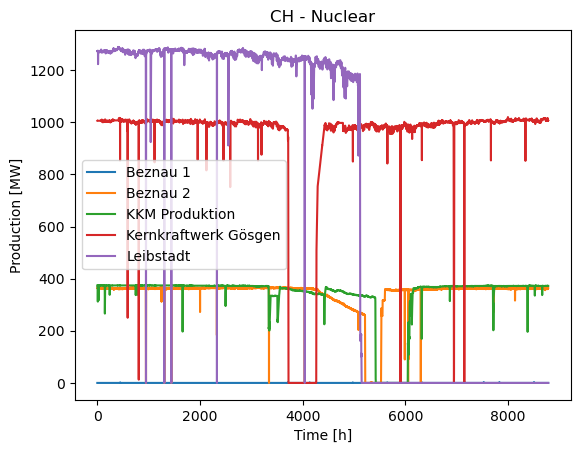

In [15]:
plot_multiple('CH', 'Nuclear', 5)

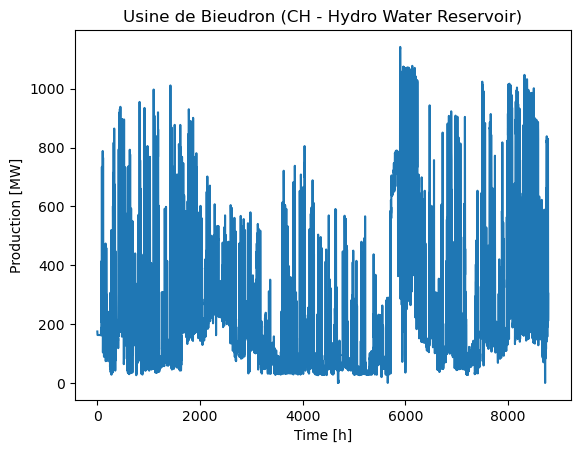

Usage: 22.1 %


In [16]:
plot_single('Usine de Bieudron')

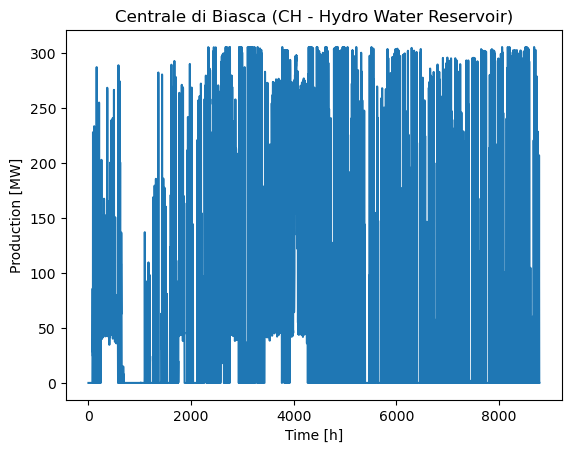

Usage: 21.3 %


In [17]:
plot_single('Centrale di Biasca')

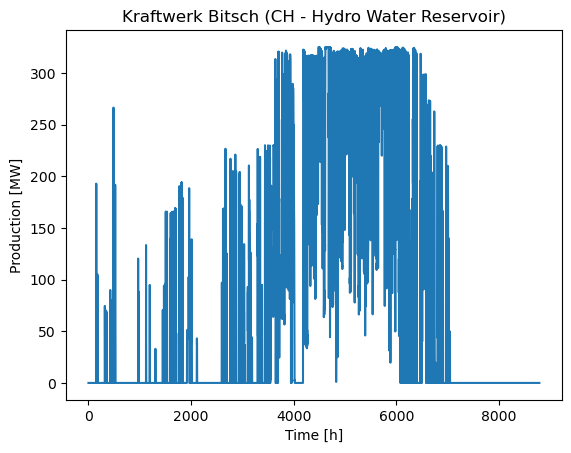

Usage: 23.4 %


In [18]:
plot_single('Kraftwerk Bitsch')

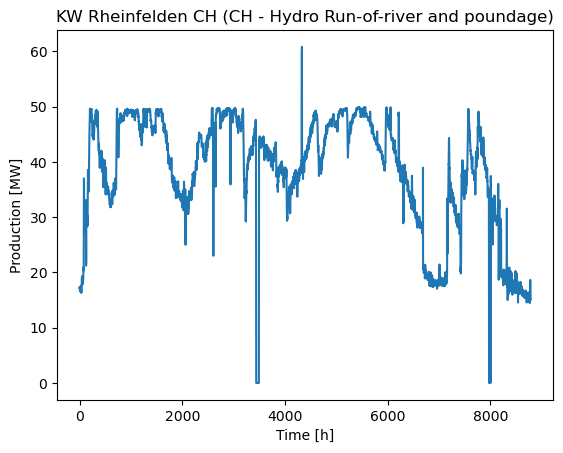

Usage: 63.0 %


In [19]:
plot_single('KW Rheinfelden CH')

## France

In [20]:
list(gens['FR'].keys())

['Fossil Gas',
 'Fossil Hard coal',
 'Fossil Oil',
 'Hydro Pumped Storage',
 'Hydro Run-of-river and poundage',
 'Hydro Water Reservoir',
 'Nuclear',
 'Other']

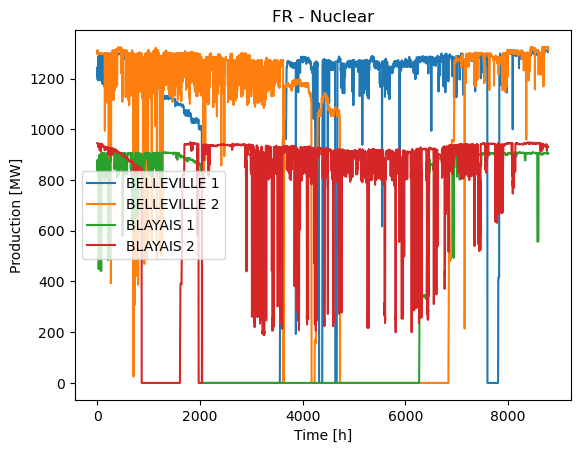

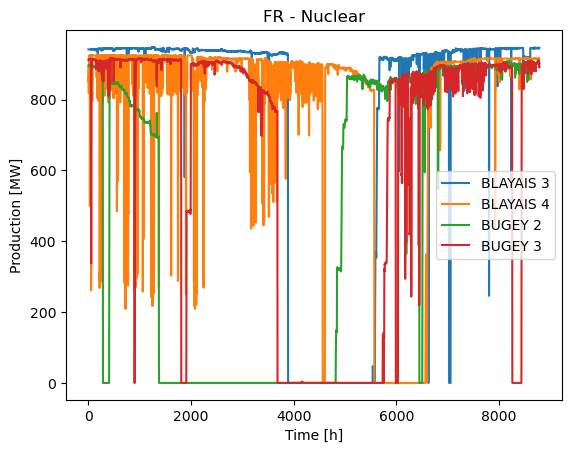

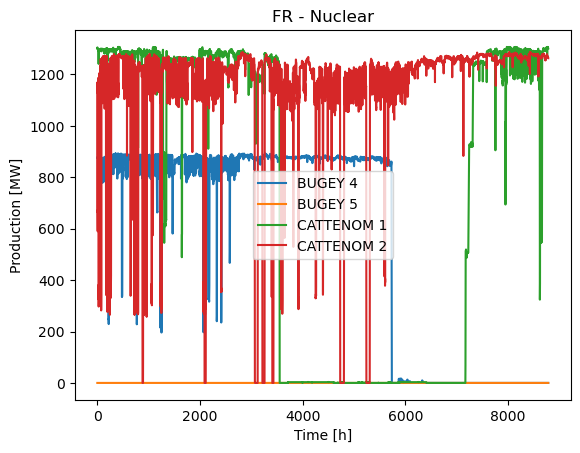

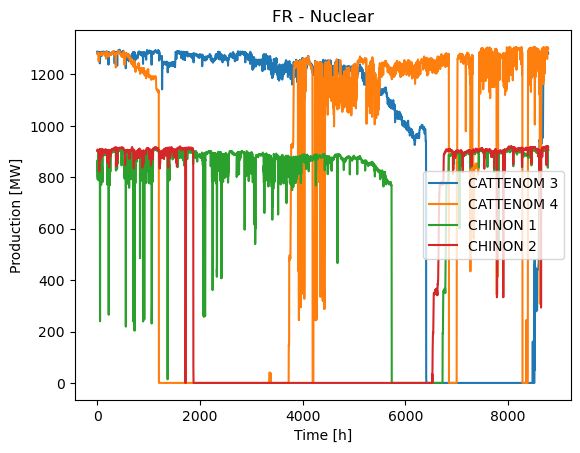

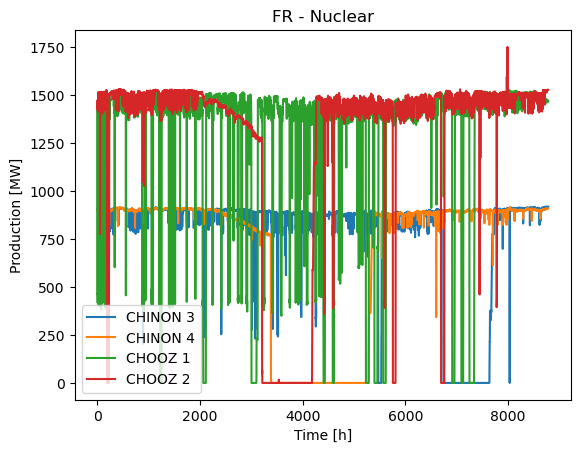

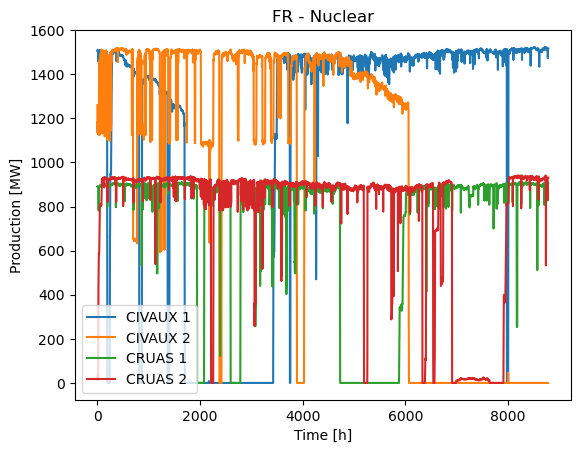

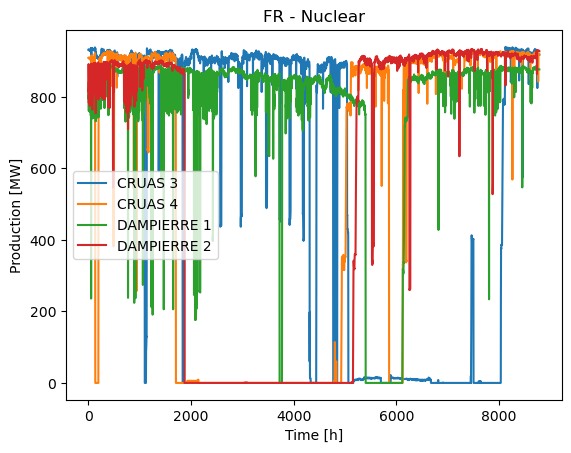

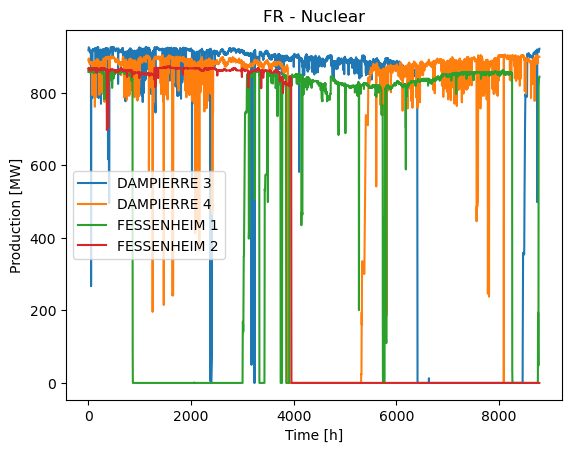

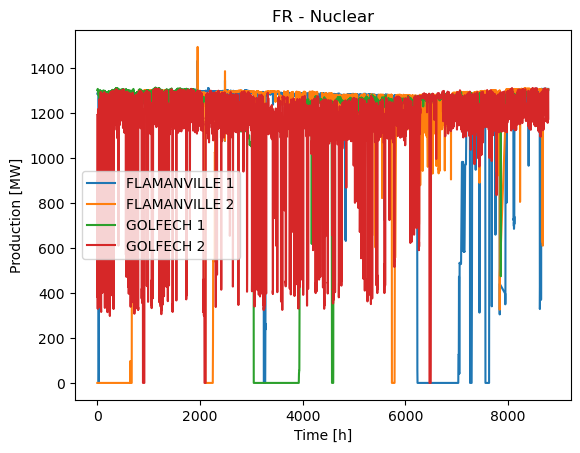

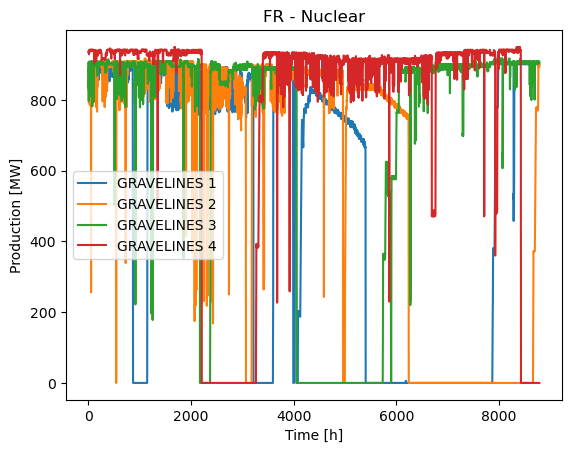

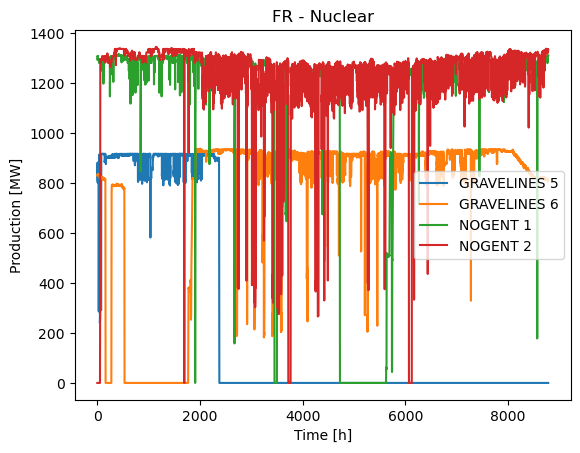

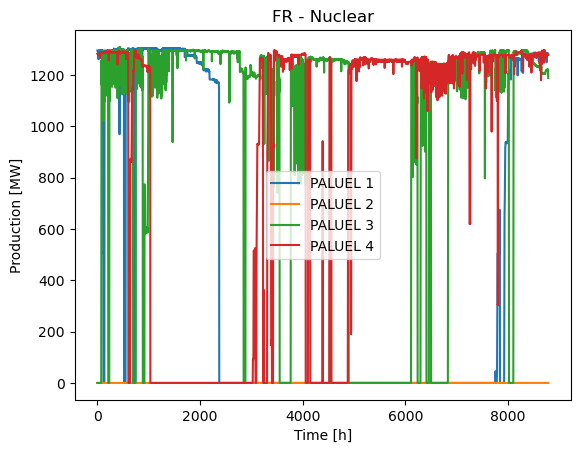

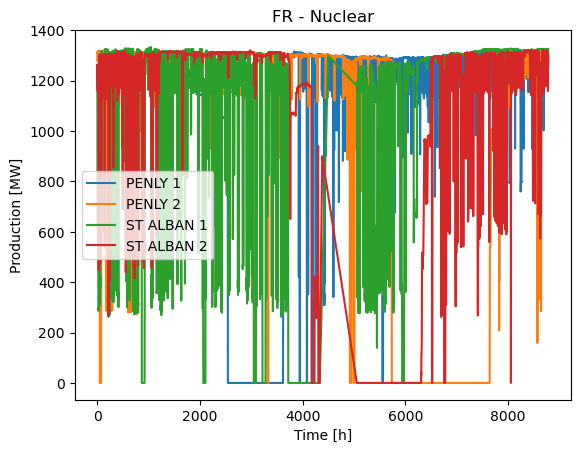

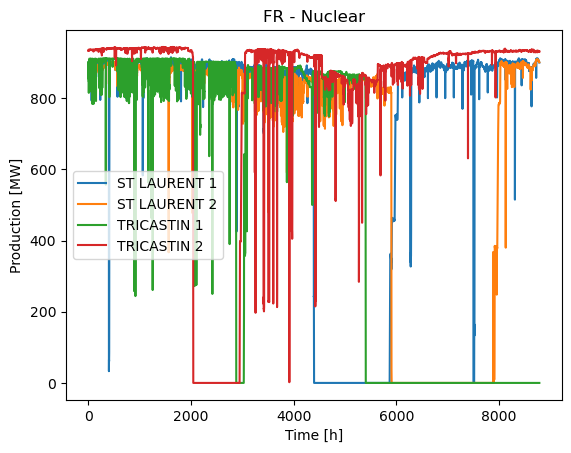

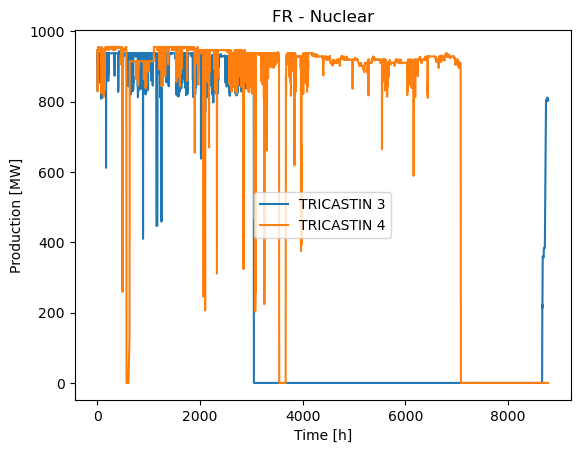

In [21]:
plot_multiple('FR', 'Nuclear')

In [22]:
gens['FR']['Hydro Water Reservoir']

["COMBE D'AVRIEUX 1",
 'BROMMAT 7',
 'SISTERON 2',
 'POUGET 4',
 'BORT 1',
 'SISTERON 1',
 'VILLARODIN 2',
 'AIGLE 6',
 'VILLARODIN 1',
 'BORT 2']

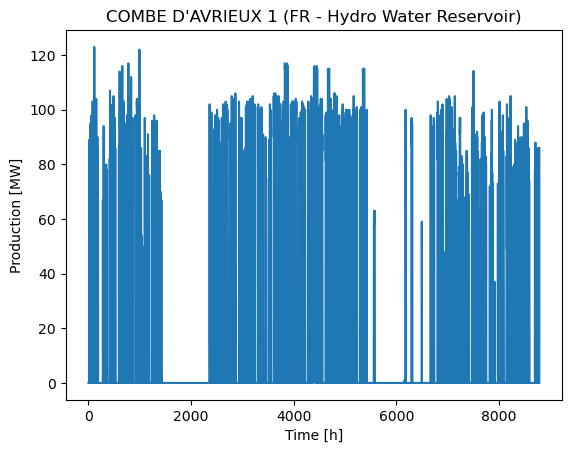

Usage: 16.5 %


In [23]:
plot_single("COMBE D'AVRIEUX 1")

## Germany

In [24]:
list(gens['DE_50HzT'].keys()), list(gens['DE_Amprion'].keys()), list(gens['DE_TenneT_GER'].keys()), list(gens['DE_TransnetBW'].keys())

(['Fossil Brown coal/Lignite',
  'Fossil Gas',
  'Fossil Hard coal',
  'Fossil Oil',
  'Hydro Pumped Storage'],
 ['Fossil Brown coal/Lignite',
  'Fossil Coal-derived gas',
  'Fossil Gas',
  'Fossil Hard coal',
  'Hydro Pumped Storage',
  'Nuclear'],
 ['Fossil Brown coal/Lignite',
  'Fossil Gas',
  'Fossil Hard coal',
  'Fossil Oil',
  'Hydro Pumped Storage',
  'Hydro Water Reservoir',
  'Nuclear'],
 ['Fossil Gas',
  'Fossil Hard coal',
  'Fossil Oil',
  'Hydro Pumped Storage',
  'Hydro Run-of-river and poundage',
  'Nuclear',
  'Waste'])

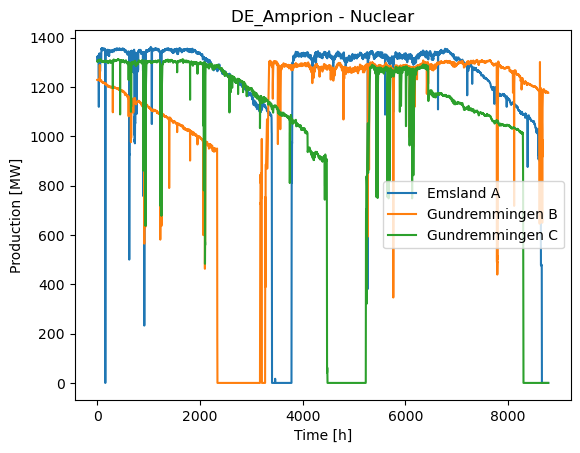

In [25]:
plot_multiple('DE_Amprion', 'Nuclear')

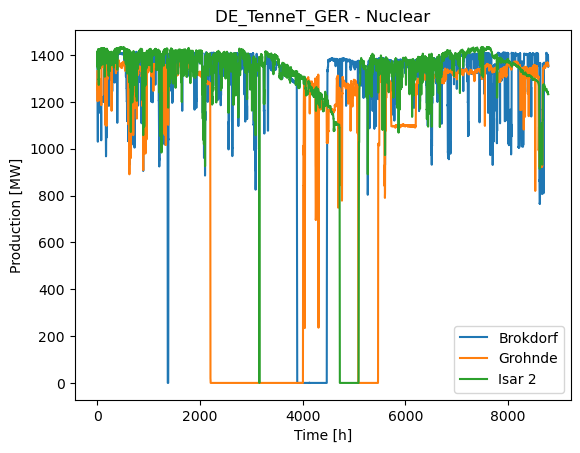

In [26]:
plot_multiple('DE_TenneT_GER', 'Nuclear')

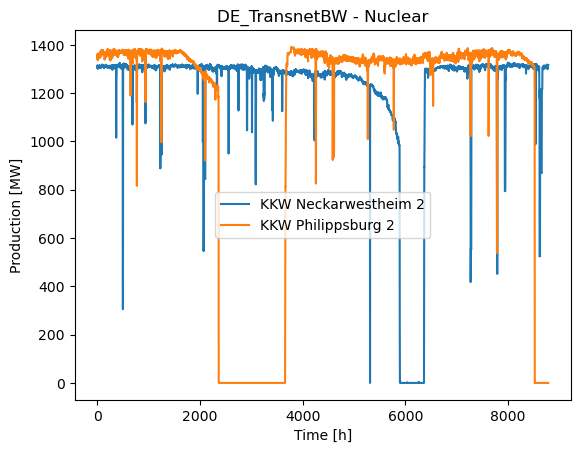

In [27]:
plot_multiple('DE_TransnetBW', 'Nuclear')

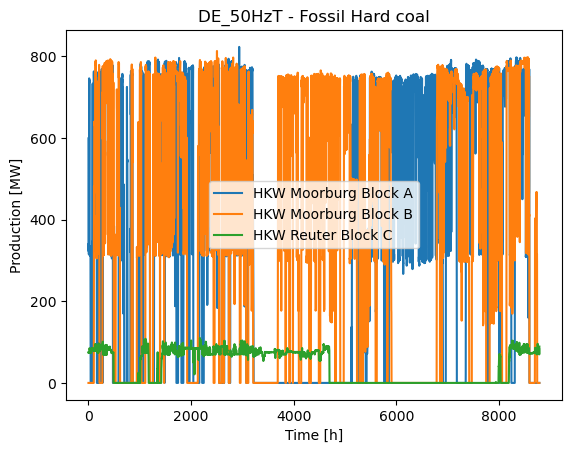

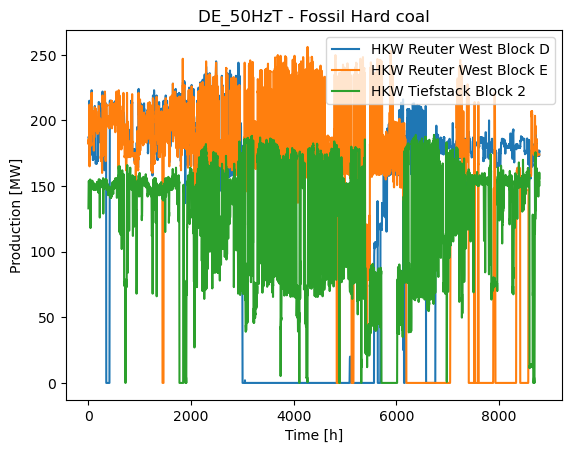

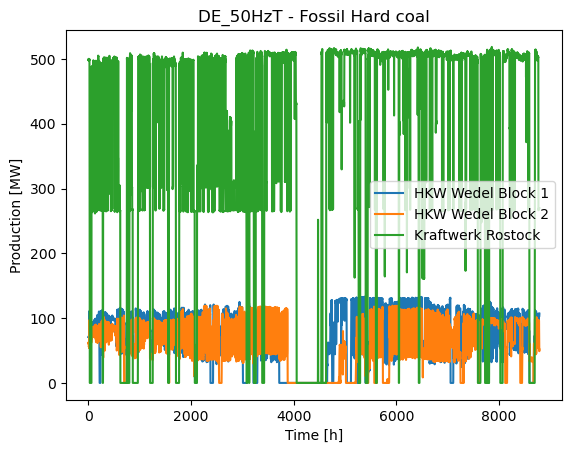

In [28]:
plot_multiple('DE_50HzT', 'Fossil Hard coal', 3)

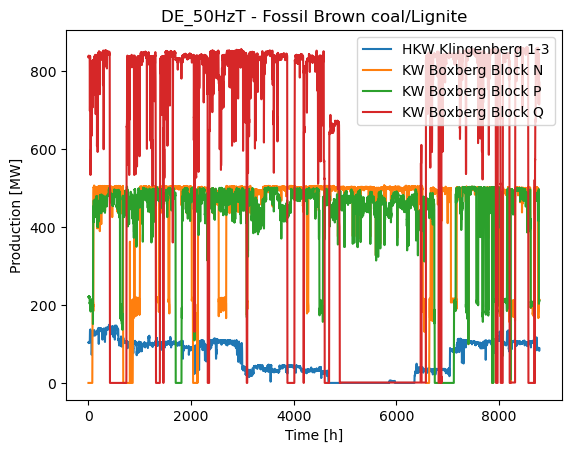

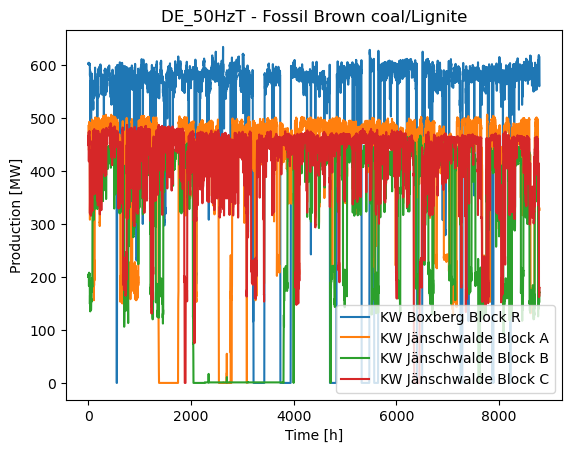

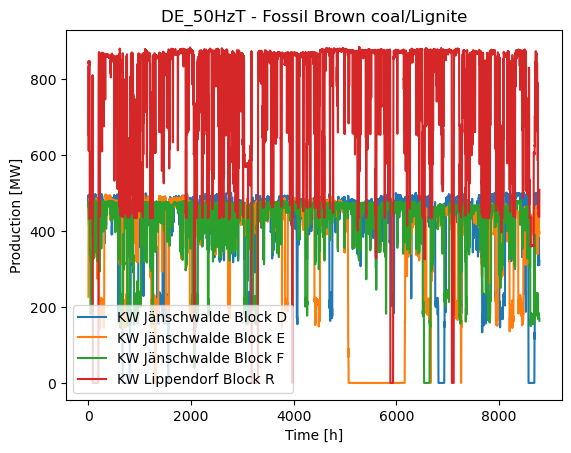

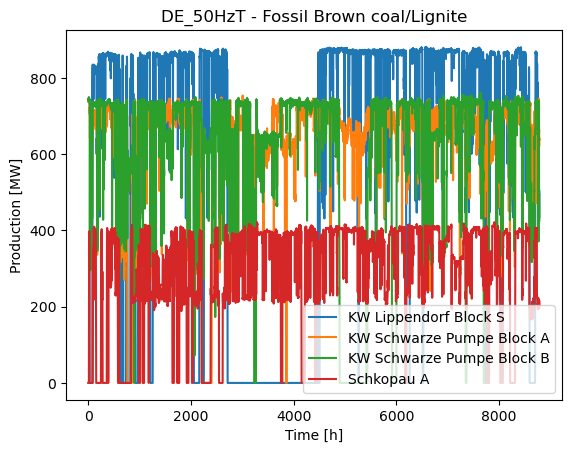

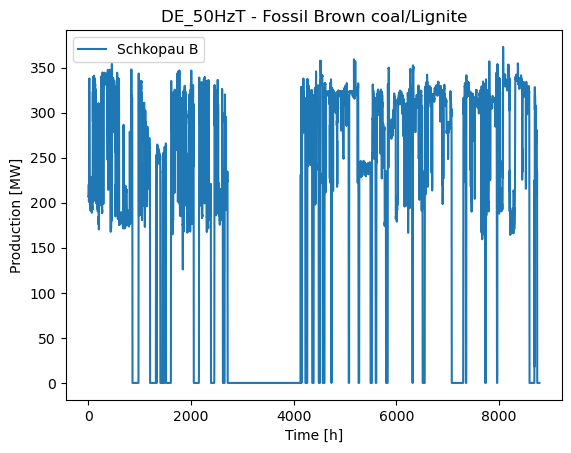

In [29]:
plot_multiple('DE_50HzT', 'Fossil Brown coal/Lignite')

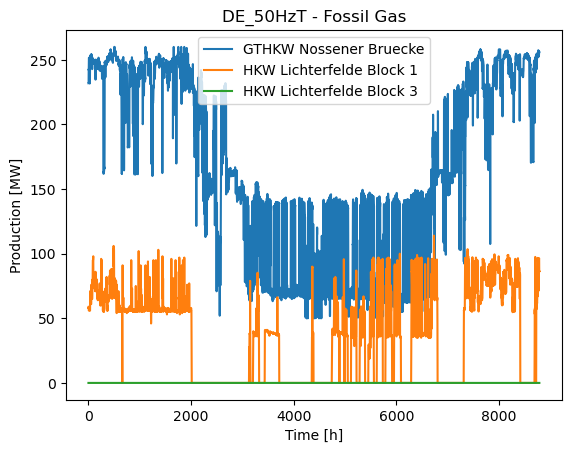

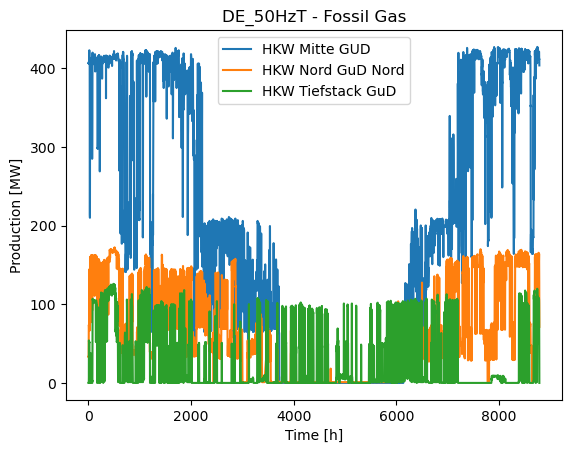

In [30]:
plot_multiple('DE_50HzT', 'Fossil Gas', 3)

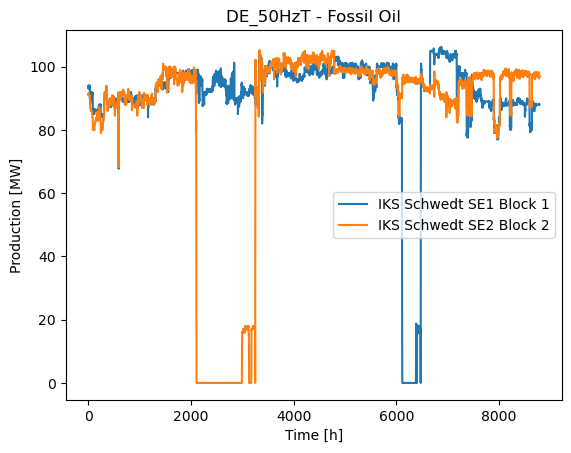

In [31]:
plot_multiple('DE_50HzT', 'Fossil Oil')